In [178]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 第十週:作業四

## 波士頓房價預測

In [179]:
from sklearn.datasets import load_boston

In [180]:
boston_dataset=load_boston()

In [181]:
boston=pd.DataFrame(boston_dataset.data,
                   columns=boston_dataset.feature_names)

In [182]:
boston['MEDV']=boston_dataset.target

In [183]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


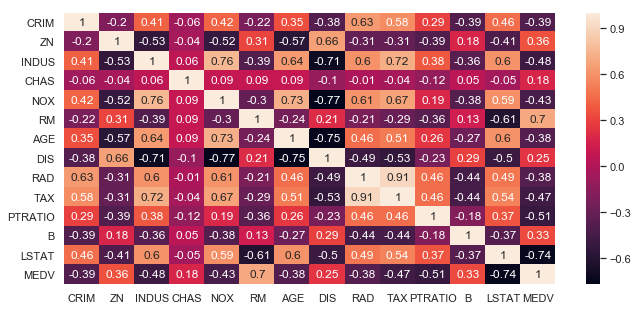

In [184]:
correlation_matrix=boston.corr().round(2)
sns.set(rc={'figure.figsize':(11,5)})
sns.heatmap(correlation_matrix,annot=True)

In [185]:
X1=boston.loc[:,["RM","PTRATIO","LSTAT"]].values    #取相關係數大於正負0.5的因素進來預測
X2=boston.loc[:,"CRIM":"LSTAT"].values              #除了房價以外的全部因素都放進來預測(作為對照組)
Y=boston.MEDV

In [186]:
from sklearn import preprocessing

### 用X1預測

In [187]:
normalized_X1 = preprocessing.normalize(X1)     #Normaliztion

In [188]:
x_train,x_test,y_train,y_test=train_test_split(normalized_X1,Y,
                                              test_size=0.25,
                                              random_state=0)

In [189]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [190]:
y_predict1=model.predict(x_test)

### 用X2做預測

In [191]:
normalized_X2 = preprocessing.normalize(X2)     #Normaliztion

In [192]:
x_train,x_test,y_train,y_test=train_test_split(normalized_X2,Y,
                                              test_size=0.25,
                                              random_state=0)

In [193]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [194]:
y_predict2=model.predict(x_test)

Text(0, 0.5, 'Predict Y')

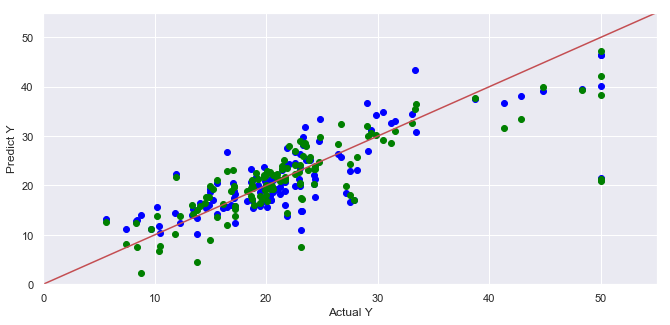

In [195]:
plt.scatter(y_test,y_predict1,c='blue')    #綠色的點是用相關係數大於正負0.5的變數去預測的結果
plt.scatter(y_test,y_predict2,c='green')   #藍色的點是用全部的變數去預測的結果(作為對照組)
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55],[0,55],'r')
plt.xlabel("Actual Y")
plt.ylabel("Predict Y")

#### 觀察起來，用相關係數大於正負0.5的變數去預測(藍色點)，比起全部變數都丟進去預測(綠色點)的結果準一些，尤其是大於40以上的部分，低估的程度變小